## PYTORCH COMPUTER VISION  

 Computer vision libraries in pytorch 
1. `torchvision` - base domain library for cmoputer vision in pytorch 
2. `torchvision.datasets` - to get dataset and data loading functions for computer vision here 
3. `torchvision.models` - get pretrained computer vision model to leverage for our own problems 
4. `torhcvision.transform` - functions for manipulating the vision data to be suitable for use for ML model 

In [1]:
import pandas as pd 
import numpy as np 
import torch 
from torch import nn 


In [2]:
import torchvision
from torchvision import datasets 
from torchvision.transforms import ToTensor
from torchvision import transforms

In [3]:
torchvision.__version__

'0.16.1+cpu'

In [4]:
train_data = datasets.FashionMNIST(
    root = "fashion" , 
    train=True , download=True , 
    transform=ToTensor(), 
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root = "fashion" , 
    train=False , download=True , 
    transform=ToTensor(), 
    target_transform=None
)

In [5]:
len(train_data) , len(test_data)

(60000, 10000)

In [6]:
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
image.shape

torch.Size([1, 28, 28])

### visualising our data 


Text(0.5, 1.0, 'Ankle boot')

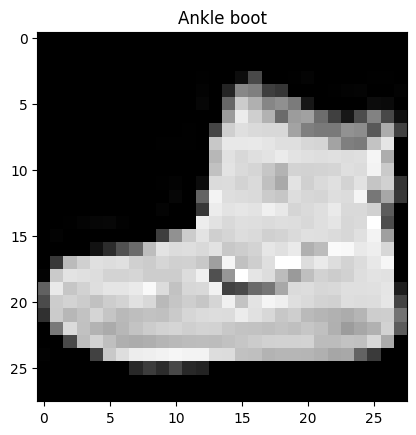

In [9]:
import matplotlib.pyplot as plt 
plt.imshow(image.squeeze() , cmap="gray")
plt.title(class_names[label])

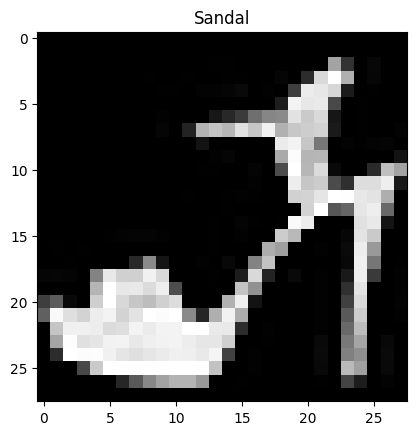

In [10]:
for i in range(10):
    plt.imshow(train_data[i][0].squeeze() , cmap="gray")
    plt.title(class_names[train_data[i][1]])
    i=i+1

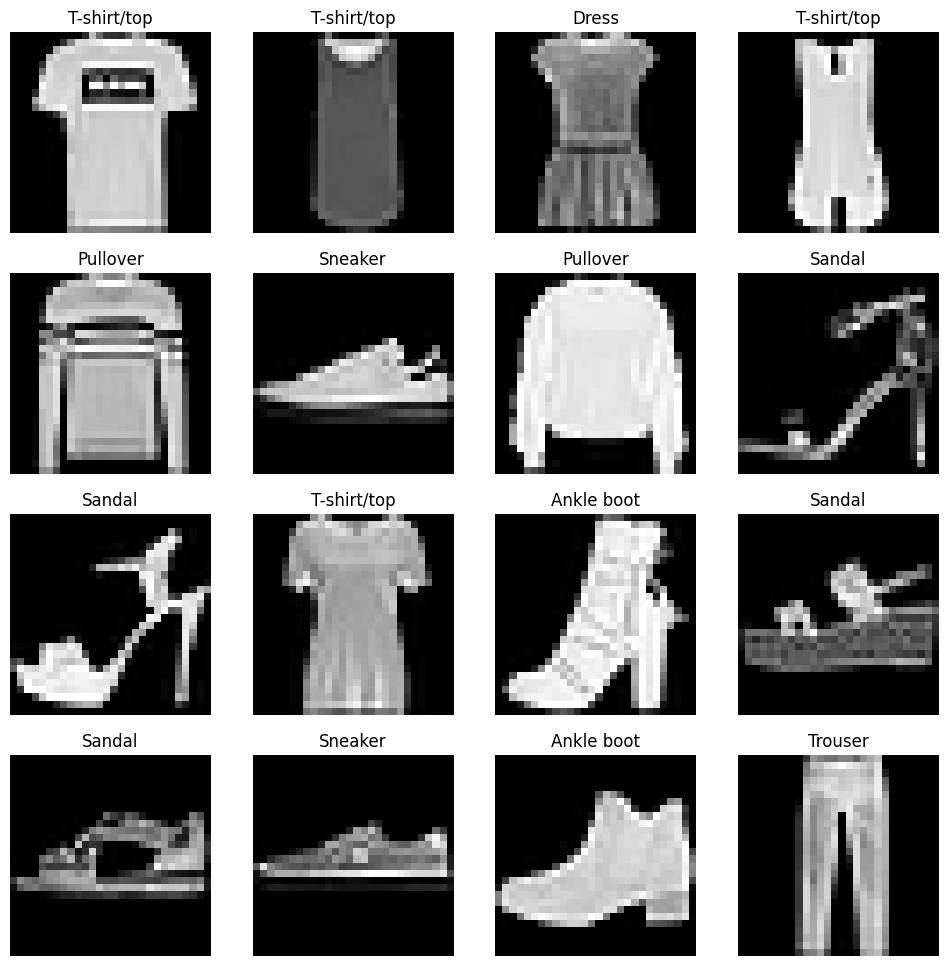

In [11]:
torch.manual_seed(42)
rows = 4 
cols = 4 
fig = plt.figure(figsize=(12 ,12))
for i in range(1 , rows*cols+1):
    random_indx = torch.randint(0 , len(train_data) , size=[1] ).item()
    fig.add_subplot(rows , cols , i)
    img , labell = train_data[i]
    plt.imshow(img.squeeze() , cmap="gray")
    plt.axis(False)
    plt.title(class_names[labell])

In [12]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: fashion
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: fashion
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32 
train_dataloader = DataLoader(dataset=train_data , batch_size=BATCH_SIZE , shuffle=True)
test_dataloader = DataLoader(dataset=test_data , batch_size=BATCH_SIZE , shuffle=False)
train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x17018182790>,
 <torch.utils.data.dataloader.DataLoader at 0x17017d3c8d0>)

In [14]:
len(train_dataloader)

1875

In [15]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [16]:
len(train_features_batch)

32

Text(0.5, 1.0, 'Bag')

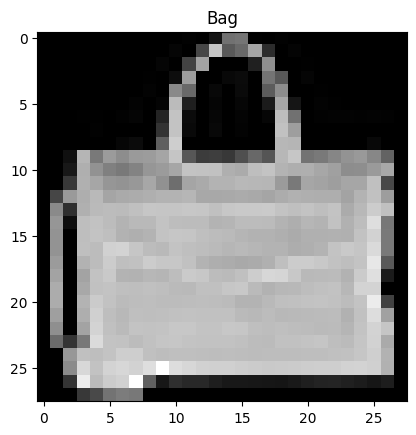

In [17]:
# torch.manual_seed(42)
random_index = torch.randint(0 , len(train_features_batch) , size=[1]).item()
imagee , labbel = train_features_batch[random_index] , train_labels_batch[random_index]
plt.imshow(imagee.squeeze() , cmap="gray")
plt.title(class_names[labbel])

In [18]:
#making a flatten layer 
flatten_layer = nn.Flatten()

x=train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [70]:
from torch import nn 
class fashinmnistmodel(nn.Module):
    def __init__(self , input_shape:int , output_shape:int , hidden_layer :int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten() ,
            nn.Linear(in_features=input_shape , out_features=64) ,
            nn.ReLU(),
            nn.Linear(in_features=64 , out_features=32) ,
            nn.ReLU(),
            nn.Linear(in_features=32 , out_features=output_shape)
        )
    def forward(self , x):
        return self.layer_stack(x)

In [71]:
torch.manual_seed(42)

model_0 = fashinmnistmodel(
    input_shape=784, output_shape=len(class_names) , hidden_layer=10
)

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_0.parameters() , lr=0.01)


In [72]:
from timeit import default_timer as timer
from helper_function import accuracy_fn
def print_train_time(start:float , end:float ):
    total_time = end-start
    print(f"total time : {total_time}")
    return total_time

In [73]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time ,end= end_time)

total time : 1.6600002709310502e-05


1.6600002709310502e-05

1. loop through epochs
2. loop through batches , perform training_steps , calculate train loss per batch  
3. loop through testing batches and then perform testing steps , and find out testing loss per batch
4. print out whats happening 


In [74]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.
    
    Args:
    y_true (torch.Tensor): True labels.
    y_pred (torch.Tensor): Predictions.
    
    Returns:
    [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [75]:
# importing tqdm for the progress bar 
from tqdm.auto import tqdm 
torch.manual_seed(42)
start_time=timer()

epochs = 10

for epoch in tqdm(range(epochs)):
    train_loss = 0
    #add a loop to iterate through all the training batches 
    for batch , (X , y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        loss=loss_fn(y_pred , y)
        train_loss+=loss
        optim.zero_grad()
        loss.backward()
        optim.step()
        
        if batch%400==0:
            print(f"EPOCH NUMBER : {epoch} | BATCH NUMBER : {batch} | TRAIN LOSS : {loss}")
    train_loss/=len(train_dataloader)
    
    #testing mode
    test_loss=0 
    test_acc =0
    model_0.eval()
    with torch.no_grad():
        for X_test , y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss+=loss_fn(test_pred , y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)
    print(f"EPOCH : {epoch} | AVG TRAIN LOSS : {train_loss} | AVG TEST LOSS : {test_loss} | TEST ACCURACY : {test_acc} ")
end_time=timer()
print_train_time(start=start_time , end=end_time)

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH NUMBER : 0 | BATCH NUMBER : 0 | TRAIN LOSS : 2.3017232418060303
EPOCH NUMBER : 0 | BATCH NUMBER : 400 | TRAIN LOSS : 0.46616196632385254
EPOCH NUMBER : 0 | BATCH NUMBER : 800 | TRAIN LOSS : 0.6182660460472107
EPOCH NUMBER : 0 | BATCH NUMBER : 1200 | TRAIN LOSS : 0.33754462003707886
EPOCH NUMBER : 0 | BATCH NUMBER : 1600 | TRAIN LOSS : 0.2530224919319153
EPOCH : 0 | AVG TRAIN LOSS : 0.5302619338035583 | AVG TEST LOSS : 0.45674118399620056 | TEST ACCURACY : 83.67611821086263 
EPOCH NUMBER : 1 | BATCH NUMBER : 0 | TRAIN LOSS : 0.37121185660362244
EPOCH NUMBER : 1 | BATCH NUMBER : 400 | TRAIN LOSS : 0.6981926560401917
EPOCH NUMBER : 1 | BATCH NUMBER : 800 | TRAIN LOSS : 0.4033987820148468
EPOCH NUMBER : 1 | BATCH NUMBER : 1200 | TRAIN LOSS : 0.3799554407596588
EPOCH NUMBER : 1 | BATCH NUMBER : 1600 | TRAIN LOSS : 0.22315065562725067
EPOCH : 1 | AVG TRAIN LOSS : 0.4369736611843109 | AVG TEST LOSS : 0.45318979024887085 | TEST ACCURACY : 84.21525559105432 
EPOCH NUMBER : 2 | BATCH NUMBE

191.7724276000008